In [1]:
# Um zu verstehen, was die Funktioenen genau machen, sollte Kapitel 2 in der schriftlichen Arbeit geslesen werden.

In [2]:
# verwendete Module
import math
import matplotlib.pyplot as plt
import numpy.linalg as npl
import numpy as np
import ipyvolume as ipv
import pandas as pd
import os
import time

# class vec3

In [3]:
# Es wird eine Klasse für 3-dimensionale Vektoren und ihre Operatioen erstellt
class vec3:
    def __init__(self, x,y,z):
        self.x = x
        self.y = y
        self.z = z

    def dot(self, other): # Skalarprodunkt zweier Vektoren
        return self.x * other.x + self.y * other.y + self.z * other.z

    def transform(self, v1, v2, v3): # Vector-Matrix-Multiplikation, v1, v2, v3 sind die Zeilenvectoren der Matrix
        return vec3(self.dot(v1),
                    self.dot(v2),
                    self.dot(v3))

    def sub(self, other): # Vektorsubtraktion
        return vec3(self.x - other.x,
                    self.y - other.y,
                    self.z - other.z)
    def __sub__(self, other):
        return self.sub(other)

    def add(self, other): # Vektoraddition
        return vec3(self.x + other.x,
                    self.y + other.y,
                    self.z + other.z)
    def __add__(self, other):
        return self.add(other)

    def sumup(self, other): # Vektoren werden aufsummiert (das self wird umgeschreiben)
        self.x += other.x
        self.y += other.y
        self.z += other.z

    def multiply_scalar(self, scalar): # Vektor-Skalar-Multiplikatio
        return vec3(self.x * scalar,
                    self.y * scalar,
                    self.z * scalar)

    def multiply_vec3(self, other): # Vector-Vector-Multiplikation, Resultat ist wieder ein Vektor
        return vec3(self.x * other.x,
                    self.y * other.y,
                    self.z * other.z)

    def cross(self, other): # Kreuzprodukt
        return vec3(self.y * other.z - self.z * other.y,
                    self.z * other.x - self.x * other.z,
                    self.x * other.y - self.y * other.x)

    def length(self): # Betrag des Vektors
        return math.sqrt(self.x * self.x +
                         self.y * self.y +
                         self.z * self.z)

    def covariance_matrix(self, other): # berechnet die Kovarianzmatrix des Vektors v: v * v.T
        xx = self.x * other.x
        xy = self.x * other.y
        xz = self.x * other.z
        yy = self.y * other.y
        yz = self.y * other.z
        zz = self.z * other.z
        return matrix3(xx, xy, xz,
                       xy, yy, yz,
                       xz, yz, zz)

    def to_array(self): # convertiert vec3 in Numpy-Array
        return np.array([self.x, self.y, self.z], dtype=np.float64)

    def __str__(self): # zum printen
        return str((self.x, self.y, self.z))
        


    def isequal_array(self, array): # Prüft, ob array und vec3 gleich sind oder nicht ...
                                    # ... Sie können vor dem Prüfen auf eine beliebige Nachkomma stelle gerundet
        if (not array[0] == self.x) or (not array[1] == self.y) or (not array[2] == self.z):
            print('False: vec - array')
            return False
        return True
    def isequal_array_rounded(self, arr, r):
        array = np.round(arr, r)
        if (not array[0] == round(self.x, r)) or (not array[1] == round(self.y, r)) or (not array[2] == round(self.z, r)):
            print('False: vec - array; rounded')
            return False
        return True

    def isequal_vec3_vec3(self, other): # Prüft, ob vec3 und vec3 gleich sind oder nicht
        if not self.x == other.x or not self.y == other.y or not self.z == other.z:
            print('False: vec - vec')
            return False
        return True
    def isequal_vec3_vec3_rounded(self, other, r):
        if not round(self.x , r) == round(other.x, r) or not round(self.y , r)== round(other.y, r) or not round(self.z , r)== round(other.z, r):
            print('False: vec - vec; rounded')
            return False
        return True
        
    @classmethod
    def from_array(vec3, array):# ertellt vec3-Vector aus einem Numpy-Array
                                # Achte darauf, dass die array vom Typ float64 ist (float32 nicht exakt: 3,3 --> 3.29999126)
        x,y,z = array
        return vec3(float(x), float(y), float(z))
        
    @classmethod
    def from_matrix(vec3, m): # matrix3 wird als drei vec3-Vektoren geschrieben
        return vec3(m.x_0, m.y_0, m.z_0), vec3(m.x_1, m.y_1, m.z_1), vec3(m.x_2, m.y_2, m.z_2)



# class matrix3

In [4]:
# es wird eine Klasse für 3x3-Matrizen erstellt
class matrix3:
    def __init__(self, x_0, y_0, z_0,
                       x_1, y_1, z_1,
                       x_2, y_2, z_2):
        self.x_0, self.y_0, self.z_0 = x_0, y_0, z_0
        self.x_1, self.y_1, self.z_1 = x_1, y_1, z_1
        self.x_2, self.y_2, self.z_2 = x_2, y_2, z_2
    
    def multiply_scalar(self, scalar): # matrix-skalar-multiplikation
        return matrix3(self.x_0 * scalar, self.y_0 * scalar, self.z_0 * scalar,
                       self.x_1 * scalar, self.y_1 * scalar, self.z_1 * scalar,
                       self.x_2 * scalar, self.y_2 * scalar, self.z_2 * scalar)

    def multiply_vec3(self, v): # matrix-vector-multiplikation
        return vec3(self.x_0 * v.x + self.y_0 * v.y + self.z_0 * v.z,
                    self.x_1 * v.x + self.y_1 * v.y + self.z_1 * v.z,
                    self.x_2 * v.x + self.y_2 * v.y + self.z_2 * v.z)
        
    def sumup(self, other): # aufsummierung (self wird übergeschrieben)
        self.x_0 += other.x_0 
        self.y_0 += other.y_0
        self.z_0 += other.z_0
        self.x_1 += other.x_1 
        self.y_1 += other.y_1
        self.z_1 += other.z_1
        self.x_2 += other.x_2 
        self.y_2 += other.y_2
        self.z_2 += other.z_2

    def add(self, other): # matrix addition
        return matrix3(self.x_0 + other.x_0, self.y_0 + other.y_0, self.z_0 + other.z_0,
                       self.x_1 + other.x_1, self.y_1 + other.y_1, self.z_1 + other.z_1,
                       self.x_2 + other.x_2, self.y_2 + other.y_2, self.z_2 + other.z_2)
    def __add__(self, other):
        return self.add(other)
    
    def __str__(self): # zum printen
        return ('(' + str((self.x_0, self.y_0, self.z_0)) + '\n ' + 
                      str((self.x_1, self.y_1, self.z_1)) + '\n ' + 
                      str((self.x_2, self.y_2, self.z_2)) + ')' )

    def to_array(self): # matrix3 in numpy-array
        return np.array([[self.x_0, self.y_0 , self.z_0],
                         [self.x_1, self.y_1 , self.z_1],
                         [self.x_2, self.y_2 , self.z_2]], dtype=np.float64)

    def isequal_array(self, array): # gleichheitprüfung: matrix3 numpy_array
        if ((not self.x_0 == array[0][0]) or (not self.y_0 == array[0][1]) or (not self.z_0 == array[0][2]) or
            (not self.x_1 == array[1][0]) or (not self.y_1 == array[1][1]) or (not self.z_1 == array[1][2]) or
            (not self.x_2 == array[2][0]) or (not self.y_2 == array[2][1]) or (not self.z_2 == array[2][2])):
            print('False: mat3 - array')
            return False
        return True
    def round(self, r):
        return matrix3(round(self.x_0, r), round(self.y_0, r), round(self.z_0, r),
                       round(self.x_1, r), round(self.y_1, r), round(self.z_1, r),
                       round(self.x_2, r), round(self.y_2, r), round(self.z_2, r))
    def isequal_array_rounded(self, arr, r):
        array = np.round(arr, r)
        matrix = self.round(r)
        if ((not matrix.x_0 == array[0][0]) or (not matrix.y_0 == array[0][1]) or (not matrix.z_0 == array[0][2]) or
            (not matrix.x_1 == array[1][0]) or (not matrix.y_1 == array[1][1]) or (not matrix.z_1 == array[1][2]) or
            (not matrix.x_2 == array[2][0]) or (not matrix.y_2 == array[2][1]) or (not matrix.z_2 == array[2][2])):
            print('False: mat3 - array; rounded')
            return False
        return True

    @classmethod
    def from_array(matrix3, array): # erstellt matrix3 aus numpy_array
        a, b, c = array
        x_0, y_0, z_0 = a 
        x_1, y_1, z_1 = b
        x_2, y_2, z_2 = c
        return matrix3(float(x_0), float(y_0), float(z_0),
                       float(x_1), float(y_1), float(z_1),
                       float(x_2), float(y_2), float(z_2))


        


# class triangle

In [5]:
# Es wird eine Klasse für Dreiecke erstellt.
# Dabei werden die konstanten beim MT-Algorithmus zum Bestimmen
# der Schnittpunkte zwischen einem Strahl und einem Dreieck
# berechnet, welche nicht vom Strahl abhängig sind, und in der Klasse gespeichert. 
class triangle:
    # origin = vec3(0,0,0)
    def __init__(self, v1 , v2, v3):
        self.b = v2
        self.c = v3
        self.a = v1
        self.ab = self.b.sub(self.a)
        self.ac = self.c.sub(self.a)
        self.normal = self.ac.cross(self.ab)
        self.tvec = self.a.multiply_scalar(-1) # nur wenn Ursprung des Vektors im Ursprung ist (origin - a) = a * -1
        self.u_constant = self.ac.cross(self.tvec)
        self.v_constant = self.tvec.cross(self.ab)
        self.t = self.v_constant.dot(self.ac)
        self.x = [v1.x, v2.x, v3.x]
        self.y = [v1.y, v2.y, v3.y]
        self.z = [v1.z, v2.z, v3.z]
        

    def __str__(self):
        return str(str(self.a) + '\n ' +
                    str(self.b) + '\n ' +
                    str(self.c))

# equality check

In [6]:
# Funktionen, welche beim Verglech beider Versionen des Codes (mit eigenene Klassen/mit np.arrays) verwendet wurden
# sie sind hier archiviert
def isequal_array_list(array, list, comparison_object): # cpmparison_objekt ist ein string, welcher geprintet sollte, 
                                                        # wenn die Argumente nicht gleich sind.
    for i in range(len(array)):
        for j in range(len(array[0])):
            if not array[i][j] == list[i][j]:
                print('False: array - list; ' + str(comparison_object))
                return False
    return True

def isequal_array_list_1d(array, list, comparison_object):
    for i in range(len(array)):
        if not array[i][0] == list[i]:
                print('False: array - list_1d; ' + str(comparison_object))
                return False
    return True

def isequal_array_list_1d_rounded(array, list, r, comparison_object):
    for i in range(len(array)):
        if not round(array[i][0], r) == round(list[i], r):
                print('False: array - list_1d; rounded ' + str(comparison_object))
                return False
    return True


def isequal_array_vec3list(array, list, comparison_object):
    for i in range(len(array)):
        if not list[i].isequal_array(array[i]):
                print('False: array - vec3list; ' + str(comparison_object))
                return False
    return True

def isequal_array_vec3list_rounded(arr, list, r, comparison_object):
    array = np.round(arr, r)
    for i in range(len(array)):
        if not list[i].isequal_array_rounded(array[i], r):
                print('False: array - vec3list; rounded;' + str(comparison_object))
                return False
    return True

def isequal_Tarray_vec3list(T_1 , T_2, comparison_object):
    for i in range(len(T_1)):
        ii = i * 3
        if not T_2[ii+0].isequal_array(T_1[i][0]) or not T_2[ii+1].isequal_array(T_1[i][1]) or not T_2[ii+2].isequal_array(T_1[i][2]):
            print('False: Tarray, vec3list;' + str(comparison_object))
            return False
    return True

def isequal_Tarray_vec3list_rounded(T_1 , T_2, r, comparison_object):
    for i in range(len(T_1)):
        ii = i * 3
        if not T_2[ii+0].isequal_array_rounded(T_1[i][0], r) or not T_2[ii+1].isequal_array_rounded(T_1[i][1], r) or not T_2[ii+2].isequal_array_rounded(T_1[i][2], r):
            print('False: Tarray, veclist, rounded;' + str(comparison_object))
            return False
    return True

def isequal_list_list(list1, list2, comparison_object):
    for i in range(len(list1)):
        if not list1[i] == list2[i]:
            print('False: list - list;' + str(comparison_object))
            return False
    return True

def isequal_num_num(num1, num2, comparison_object):
    if not num1 == num2:
            print('False: num - num;' + str(comparison_object))
            return False
    return True
def isequal_num_num_rounded(num1, num2, r, comparison_object):
    if not round(num1, r) == round(num2, r):
            print('False: num - num;' + str(comparison_object))
            return False
    return True

def isequal_vec3list_vec3list(vec3list1, vec3list2, comparison_object):
    for i in range(len(vec3list1)):
        if not vec3list1[i].isequal_vec3_vec3(vec3list2[i]):
            print('False: vec3list - vec3list;' + str(comparison_object))
            return False
    return True
    
def isequal_vec3list_vec3list_rounded(vec3list1, vec3list2, r, comparison_object):
    for i in range(len(vec3list1)):
        if not vec3list1[i].isequal_vec3_vec3_rounded(vec3list2[i], r):
            print('False: vec3list - vec3list; rounded;' + str(comparison_object))
            return False
    return True

def vec3list_to_arraylist(vec3list):
    arraylist = []
    for v in vec3list:
        a = v.to_array()
        arraylist.append(a)
    return arraylist


# plotting

In [7]:
#  visualisiert Polygonnetz
# nimmt V (Menge der Eckpunkte) und F (Die Indizes der Eckpunkte, welche die Facetten bilden) als Input
def plot_mesh_v3(V, F, color='yellow'):
    x = []
    y = []
    z = []
    for i in V:
        x.append(i.x)
        y.append(i.y)
        z.append(i.z)
    ipv.plot_trisurf(x,y,z, triangles=F, color=color)
    ipv.xyzlim(-30,30)

# visualisiert 3d-Kurve
def plot_3d_curve_v3(U, color='red'):
    X = []
    Y = []
    Z = []
    for i in U:
        X.append(i.x)
        Y.append(i.y)
        Z.append(i.z)
    X = np.array(X)    
    Y = np.array(Y)
    Z = np.array(Z)
    line = ipv.plot(X, Y, Z, color=color)
def scatter_3d_curve_v3(U, color='red'):
    X = []
    Y = []
    Z = []
    for i in U:
        X.append(i.x)
        Y.append(i.y)
        Z.append(i.z)
    X = np.array(X)    
    Y = np.array(Y)
    Z = np.array(Z)
    line = ipv.scatter(X, Y, Z, color=color)

# parsing

In [8]:
def read_obj_v3(in_file): # liest OBJ-Dateiformat, funktioniert nur mit Dreiecken
    faces = []
    vertices = []
    with open(in_file, 'r') as f:
        for line in f:
            if line.startswith('v '):
                flag, x, y, z = line.split(' ')
                vertices.append(vec3(float(x), float(y), float(z)))
            elif line.startswith('f '):
                flag, t1, t2, t3 = line.split(' ')
                v1 = int(t1.split('/')[0]) - 1
                v2 = int(t2.split('/')[0]) - 1
                v3 = int(t3.split('/')[0]) - 1
                faces.append((v1, v2, v3))
    if not len(faces) or not len(vertices):
        return None
    else:
        return vertices, faces
# vertices = V (Menge der Eckpunkte), faces = F (Die Indizes der Eckpunkte, welche die Facetten bilden)        

# cPCA

In [9]:
# Die Funktionen enthalten v3 im Namen als Indikator dafür, dass sie mit
# dem Datenformat vec3 (die oben erstellte klasse) arbeiten

# Die Beschriftung der Mengen ist konsequent gehalten im ganzen Dokument
# hier wird erklärt, welche beschriftung was heisst.

def compute_T_v3(V, F): # combiniert V und F und erstellt die Menge aller Facetten (Dreiecke T)
    T = []
    for f in F:
        f1, f2, f3 = f
        T.append(V[f1])
        T.append(V[f2])
        T.append(V[f3])
    return T

def compute_S_v3(T): # berechnet die Oberflächen aller Dreiecke S und die gesamtoberfläche des Modells S_total
    S_total = 0
    S = []
    n = int(len(T) /3)
    for i in range(n):
        ii = 3 * i
        v_0 = T[ii + 0]
        v_1 = T[ii + 1]
        v_2 = T[ii + 2]
        normal = v_2.sub(v_0).cross(v_1.sub(v_0))
        s = normal.length() * 0.5
        S_total += s
        S.append(s)
    return S, S_total

def compute_G_v3(T): # bestimmt die Schwerpunkte aller Dreiecke G
    G = []
    n = int(len(T) /3)
    
    for i in range(n):
        ii = 3 * i
        v_0 = T[ii + 0]
        v_1 = T[ii + 1]
        v_2 = T[ii + 2]
        c_x = (v_0.x + v_1.x + v_2.x) / 3
        c_y = (v_0.y + v_1.y + v_2.y) / 3
        c_z = (v_0.z + v_1.z + v_2.z) / 3
        G.append(vec3(c_x, c_y, c_z))
    return G

def compute_m_I_v3(S, S_total, G): # bestimmt der SChwerpunkt des gesamten 3D-Modells m_I
    M = vec3(0, 0, 0)
    for i in range(len(S)):
        M.sumup(G[i].multiply_scalar(S[i]))
    m_I = M.multiply_scalar(1/S_total)
    return m_I


def compute_T_S_G_m_I_v3(V, F): # die oberen 4 Funktionen werden kombiniert, um Anzahl Iterationen zu verringern
    T = []
    S_total = 0
    S = []
    G = []
    M = vec3(0, 0, 0)
    normals = []
    for i in range(len(F)):
        f1, f2, f3 = F[i]
        v_0, v_1, v_2 = V[f1], V[f2], V[f3]
        T.append(v_0)
        T.append(v_1)
        T.append(v_2)

        normal = v_2.sub(v_0).cross(v_1.sub(v_0))
        normals.append(normal)
        s = normal.length() * 0.5
        S_total += s
        S.append(s)

        c_x = (v_0.x + v_1.x + v_2.x) / 3
        c_y = (v_0.y + v_1.y + v_2.y) / 3
        c_z = (v_0.z + v_1.z + v_2.z) / 3
        g = vec3(c_x, c_y, c_z)
        G.append(g)

        M.sumup(G[i].multiply_scalar(s))
    m_I = M.multiply_scalar(1/S_total)
    return T, S, S_total, G, m_I, normals
    
def shift_V_v3(V, m_I): # Zentriert das 3d-Modell, V1 = Menge der zentrierten Eckpunkte
    V1 = []
    for v in V:
        V1.append(v.sub(m_I))
    return V1

def compute_C_I_v3(S, S_total, G1, T1): # berechnet die Kovarianzmatrix des Modells C_I
    n = int(len(T1) /3)
    C_I = matrix3(
        0,0,0,
        0,0,0,
        0,0,0
    )
    for i in range(n):
        ii = 3 * i
        v_0 = T1[ii + 0]
        v_1 = T1[ii + 1]
        v_2 = T1[ii + 2]
        g = G1[i]
        c = g.covariance_matrix(g).multiply_scalar(9)
        c.sumup(v_0.covariance_matrix(v_0))
        c.sumup(v_1.covariance_matrix(v_1))
        c.sumup(v_2.covariance_matrix(v_2))
        C_I.sumup(c.multiply_scalar(S[i]))
    C_I = C_I.multiply_scalar(1/(12 * S_total))
    return C_I

def compute_eigs_v3(C_I): # bestimmt eigenvekoren und eigenwerte von C_I (über numpy)
    C_I = C_I.to_array()
    eig_values, eig_vectors = npl.eig(C_I)
    
    sorted_indices = np.argsort(eig_values)
    eig_vec_T = eig_vectors.T
    A = np.zeros((3,3))
    sorted_eig_values = np.zeros((1,3))[0]
    for i in range(len(A)):
        ii = sorted_indices[2-i]
        A[i] = eig_vec_T[ii]
        sorted_eig_values[i] = eig_values[ii]
    eigs = vec3.from_array(sorted_eig_values), matrix3.from_array(A)
    return eigs

def rotate_V1_v3(V1, A): # rotiert V1, V2 = die verschobenen und dann rotierten Eckpunkte
    V2 = []
    for v in V1:
        # v = V1[i]
        v2 = A.multiply_vec3(v)
        V2.append(v2)
    return V2

    
def compute_flipping_v3(T2, S, S_total): # Reflektionsmatrix Fl wird erstellt
    n = int(len(T2) / 3)
    fx = 0
    fy = 0
    fz = 0
    Fxyz = [0, 0, 0]
    for i in range(n):
        s = S[i]
        ii = i * 3
        v_0 = T2[ii + 0]
        v_1 = T2[ii + 1]
        v_2 = T2[ii + 2]
        x_0, y_0, z_0 = v_0.x, v_0.y, v_0.z
        x_1, y_1, z_1 = v_1.x, v_1.y, v_1.z
        x_2, y_2, z_2 = v_2.x, v_2.y, v_2.z
        x = (x_0, x_1, x_2)
        y = (y_0, y_1, y_2)
        z = (z_0, z_1, z_2)
        xyz = [sorted(x), sorted(y), sorted(z)]
        for k in range(3):
            x1, x2, x3 = xyz[k]
            J = (x1**2 + x2**2 + x3**2 + x1*x2 + x1*x3 + x2*x3)
            if x1 >= 0 and x2 >= 0 and x3 >= 0:
                Fxyz[k] = J
            elif x1 < 0 and x2 < 0 and x3 < 0:
                Fxyz[k] = -J
            elif x1  < 0 and x2 >= 0 and x3 >= 0:
                Lx = (x1**4) / ((x2-x1)*(x3-x1))
                Fxyz[k] = J - 2*Lx
            elif x3 >= 0 and x1 < 0 and x2 < 0:
                Lx = (x3**4) / ((x2-x3)*(x1-x3))
                Fxyz[k] = -J + 2*Lx
            else:
                print('error')
        fx += Fxyz[0] * s
        fy += Fxyz[1] * s
        fz += Fxyz[2] * s
    fx /= 6*S_total
    fy /= 6*S_total
    fz /= 6*S_total
    sign_x = math.copysign(1, fx)
    sign_y = math.copysign(1, fy)
    sign_z = math.copysign(1, fz)
    Fl = vec3(sign_x, sign_y, sign_z)
    return Fl

def compute_scale_v3(T2, S, S_total, p_min): # skalierungsfaktor d wird berechnet
    n = int(len(T2) / 3)
    d = 0
    for i in range(n):
        s = S[i]
        if s == 0:
            p_j = 1
        else:
            s = S[i]
            p_j = int(math.ceil(math.sqrt(p_min*s/S_total)))
        ii = i * 3
        a = T2[ii + 0]
        b = T2[ii + 1]
        c = T2[ii + 2]
        denom = 1/p_j
        d_ab = (b.sub(a)).multiply_scalar(denom)
        d_ac = (c.sub(a)).multiply_scalar(denom)
        d_g = (d_ab.add(d_ac)).multiply_scalar(1/3)
        gamma = s / ((p_j)**2)
        for x in range(p_j - 1):
            for y in range(x+1):
                g = a.add(d_ab.multiply_scalar((x-y)).add(d_ac.multiply_scalar(y).add(d_g)))
                d += gamma*(g.length() + (g.add(d_g)).length())
        for y in range(p_j):
            g = a.add(d_ab.multiply_scalar(p_j-1-y).add(d_ac.multiply_scalar(y).add(d_g)))
            d += gamma*g.length()
    d *= 1/S_total
    return d


def compute_V3_v3(V2, Fl, scale): # V2 wird skaliert und eventuel reklektiert --> V3
    V3 = []
    s = 1 / scale
    for v in V2:
        v3 = v.multiply_vec3(Fl).multiply_scalar(s)
        V3.append(v3)
    return V3


# 3D-curve

In [10]:
# Die Spirale U wird erstellt
# def compute_U_v3(number_of_points, winding_speed): # Spirale rotiert um z-Achse
#     n = number_of_points 
#     t = [math.pi*i*(1/(n)) for i in range(n)]
#     q = winding_speed
#     denom = n - 1
#     U = []
#     for i in t:
#         x = math.cos(q*i*(n/(denom)))*math.sin(i*(n/(denom)))
#         y = math.sin(q*i*(n/(denom)))*math.sin(i*(n/(denom)))
#         z = math.cos(i*(n/(denom)))
#         U.append(vec3(x,y,z))
#     return U
def compute_U_v3(number_of_points, winding_speed): # Spirale rotiert um x-Achse
    n = number_of_points 
    t = [math.pi*i*(1/(n)) for i in range(n)]
    q = winding_speed
    denom = n - 1
    U = []
    for i in t:
        z = math.cos(q*i*(n/(denom)))*math.sin(i*(n/(denom)))
        y = math.sin(q*i*(n/(denom)))*math.sin(i*(n/(denom)))
        x = math.cos(i*(n/(denom)))
        U.append(vec3(x,y,z))
    return U

def compute_T3_v3(V3, F): # Dreiecke werden in die Klasse Triangle (siehe Oben) eingeführt
    # Das passiert nach der normalisierung
    T = []
    for f in F:
        f1, f2, f3 = f
        t = triangle(V3[f1],V3[f2],V3[f3])
        T.append(t)
    return T

def takesecond(elem): # dient für die Sortierung von Listen (Sortierung nach dem 2. Element ihrer Mitglieder)
    return elem[1]


def devide_T_v3(T): # Um Rechenzeit zu reduzieren, werden die Dreiecke in 8 Teilmengen aufgeteilt
    T111 = [] # +++ (Vorzeichen von xyz)
    T11_1 = [] # ++-
    T1_11 = [] # +-+
    T1_1_1 = [] # ...
    T_111 = []
    T_11_1 = []
    T_1_11 = []
    T_1_1_1 = []
    for i in range(len(T)):
        t = T[i]
        t_T = [t.x, t.y, t.z]
        if all(n >= 0 for n in t_T[0]): # +
                                if all(n >= 0 for n in t_T[1]): # +
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T111.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T11_1.append(t)
                                                        else: # + und -
                                                            T111.append(t)
                                                            T11_1.append(t)
                                elif all(n < 0 for n in t_T[1]): #-
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T1_11.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T1_1_1.append(t)
                                                        else: # + und -
                                                            T1_11.append(t)
                                                            T1_1_1.append(t)
                                else: # + und -
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T111.append(t)
                                                            T1_11.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T11_1.append(t)
                                                            T1_1_1.append(t)
                                                        else: # + und - (*)
                                                            T111.append(t)
                                                            T1_11.append(t)
                                                            T11_1.append(t)
                                                            T1_1_1.append(t)
        elif all(n < 0 for n in t_T[0]): #-
                                if all(n >= 0 for n in t_T[1]): # +
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T_111.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T_11_1.append(t)
                                                        else: # + und -
                                                            T_111.append(t)
                                                            T_11_1.append(t)
                                elif all(n < 0 for n in t_T[1]): #-
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T_1_11.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T_1_1_1.append(t)
                                                        else: # + und -
                                                            T_1_11.append(t)
                                                            T_1_1_1.append(t)
                                else: # + und -
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T_111.append(t)
                                                            T_1_11.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T_11_1.append(t)
                                                            T_1_1_1.append(t)
                                                        else: # + und - (*)
                                                            T_111.append(t)
                                                            T_1_11.append(t)
                                                            T_11_1.append(t)
                                                            T_1_1_1.append(t)
        else: # + und -
                                if all(n >= 0 for n in t_T[1]): # +
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T111.append(t)
                                                            T_111.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T11_1.append(t)
                                                            T_11_1.append(t)
                                                        else: # + und - (*)
                                                            T111.append(t)
                                                            T11_1.append(t)
                                                            T_111.append(t)
                                                            T_11_1.append(t)
                                elif all(n < 0 for n in t_T[1]): #-
                                                        if all(n >= 0 for n in t_T[2]): # +
                                                            T1_11.append(t)
                                                            T_1_11.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #-
                                                            T1_1_1.append(t)
                                                            T_1_1_1.append(t)
                                                        else: # + und - (*)
                                                            T1_11.append(t)
                                                            T1_1_1.append(t)
                                                            T_1_11.append(t)
                                                            T_1_1_1.append(t)
                                else: # + und -
                                                        if all(n >= 0 for n in t_T[2]): # + (*)
                                                            T111.append(t)
                                                            T1_11.append(t)
                                                            T_111.append(t)
                                                            T_1_11.append(t)
                                                        elif all(n < 0 for n in t_T[2]): #- (*)
                                                            T11_1.append(t)
                                                            T1_1_1.append(t)
                                                            T_11_1.append(t)
                                                            T_1_1_1.append(t)
                                                        else: # + und - (*) eigentlich ummöglich in 8
                                                            T111.append(t)
                                                            T1_11.append(t)
                                                            T_111.append(t)
                                                            T_1_11.append(t)
                                                            T11_1.append(t)
                                                            T1_1_1.append(t)
                                                            T_11_1.append(t)
                                                            T_1_1_1.append(t)

    T_devided = [
        T111,
        T11_1,
        T1_11,
        T1_1_1,
        T_111,
        T_11_1,
        T_1_11,
        T_1_1_1
    ]
    return T_devided

def intersection_segment_triangle_v3_2(segment, T): # berchnet schnittpunkt zwischne segment und T, wenn vorhanden
    D = segment
    denom = D.dot(T.normal)
    if denom == 0:
        return False # reicht für unsere Zwecke, kann aber verbessert werden (auf der anderen Seite schauen)
    invDenom = 1.0 / denom
    u = D.dot(T.u_constant) * invDenom
    if u > 1 or u < 0:
        return False
    v = D.dot(T.v_constant) * invDenom
    if u + v > 1 or v < 0:
        return False
    t = T.t * invDenom
    if t < 0:
        return False
    else:
        return D.multiply_scalar(t)

def compute_X_and_R_from_T_devided_v3(U, V3, F): # erstellt 3D-Kurve X, und Abstand-Kurve R
    T3 = compute_T3_v3(V3, F)
    T_devided = devide_T_v3(T3)
    n = len(U) 
    R = []
    X = []
    for i in range(n):
        O = []
        if U[i].x >= 0:
                        if U[i].y >= 0:
                                        if U[i].z >= 0:
                                            # print('111')
                                            for t in T_devided[0]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        elif U[i].z < 0:
                                            # print('11_1')
                                            for t in T_devided[1]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        else:
                                            print('Fehler 2')
                        elif U[i].y < 0:
                                        if U[i].z >= 0:
                                            # print('1_11')
                                            for t in T_devided[2]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        elif U[i].z < 0:
                                            # print('1_1_1')
                                            for t in T_devided[3]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        else:
                                            print('Fehler 3')
                        else:
                            print('Fehler 1')
        elif U[i].x < 0:
                        if U[i].y >= 0:
                                        if U[i].z >= 0:
                                            # print('_111')
                                            for t in T_devided[4]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))

                                        elif U[i].z < 0:
                                            # print('_11_1')
                                            for t in T_devided[5]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        else:
                                            print('Fehler 5')
                        elif U[i].y < 0:
                                        if U[i].z >= 0:
                                            # print('_1_11')
                                            for t in T_devided[6]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        elif U[i].z < 0:  
                                            # print('_1_1_1')
                                            for t in T_devided[7]:
                                                Q = intersection_segment_triangle_v3_2(U[i], t)
                                                if Q:
                                                    r = Q.length()
                                                    O.append((Q, r))
                                        else:
                                            print('Fehler 6')

                        else:
                            print('Fehler 4')
        else:
            print('Fehler')
        if len(O) == False: ### no intersection, work on it later
            O.append((vec3(0,0,0), 0))
        else:
            O.sort(key=takesecond, reverse=True)
        X.append(O[0][0])
        R.append(O[0][1])
    return X, R




# feature vector

In [11]:
def compute_FSC_v3(coefficients_number, f): # berechnet Fourier-Koeffizienten (a, b und c)
    N = len(f)
    T = math.pi
    w = 2 #* math.pi / T
    dt = T / (N)
    t = [i*dt for i in range(N)]
    coeff_number = coefficients_number + 1
    As = []
    Bs = []
    Cs = []
    for n in range(coeff_number):
        a_n = 0
        b_n = 0
        for i in range(N):
            phi = n*w*t[i]
            a_n += f[i] * math.cos(phi) * dt
            b_n += f[i] * math.sin(phi) * dt
        a_n *= (2 / T)
        b_n *= (2 / T)
        As.append(a_n)
        Bs.append(b_n)
        Cs.append((1/2) * (a_n - 1j*b_n))
        Cs.append((1/2) * (a_n + 1j*b_n))
    del Cs[0]
    As[0] /= 2
    return (As, Bs), Cs
# def compute_FSC_v3(coefficients_number, f): # wie oben aber ohne duplikate
#     N = len(f)
#     T = math.pi
#     w = 2 #* math.pi / T
#     dt = T / (N)
#     t = [i*dt for i in range(N)]


#     coeff_number = coefficients_number


#     As = []
#     Bs = []
#     Cs = []
#     for n in range(coeff_number):
#         a_n = 0
#         b_n = 0
#         for i in range(N):
#             phi = n*w*t[i]
#             a_n += f[i] * math.cos(phi) * dt
#             b_n += f[i] * math.sin(phi) * dt
#         a_n *= (2 / T)
#         b_n *= (2 / T)
#         As.append(a_n)
#         Bs.append(b_n)
#         Cs.append((1/2) * (a_n - 1j*b_n))


#     #     Cs.append((1/2) * (a_n + 1j*b_n))
#     # del Cs[0]


#     As[0] /= 2
#     return (As, Bs), Cs
        
def invert_FSC_v3(number_of_points, C): # rekonstruiert R aus Fourier-Koeffizienten
    As = C[0]
    Bs = C[1]
    N = number_of_points
    T = math.pi
    w = 2
    dt = T / (N)
    t = [i*dt for i in range(N)]
    coeff_number = len(As)
    F = []
    for i in range(N):
        f_t = 0
        for n in range(coeff_number):
            phi = n * w * t[i]
            f_t += (As[n] * math.cos(phi)) + (Bs[n] * math.sin(phi))
        F.append(f_t)
    return F

def extract_feasure_vector_v3(Cs): # Merkmalsvektor wird erstellt, fv = merkmalsvektor
    fv = []
    for c in Cs:
        length = math.sqrt(c.real**2 + c.imag**2)
        fv.append(length)
    return fv

def compute_distance_2_v3(fv1, fv2):
    N = len(fv1)
    d2 = 0
    for i in range(N):
        d2 += (fv1[i] - fv2[i])**2
    d2 = math.sqrt(d2)
    return d2


# object2

In [12]:

class object2: # dtype vec3
    number_of_points = 15000 # Anzahl Punkte auf der 3D-Kurve
    winding_speed = 200 # Windungszahl
    p_min = 64000 # wird für die bestimmung des Skalierungsfaktors verwendet
    c_number = 300 # Bestimmt Anzahl Fourier-Koeffizienen im Merkmalsvektor
    plot_scale_U = 5 # skalierung für die visualisierung
    U = compute_U_v3(number_of_points, winding_speed)
    def __init__(self, V, F):
        self.V = V
        self.F = F

        # normalisierung
        self.T, self.S, self.S_total, self.G, self.m_I, self.normals1  = compute_T_S_G_m_I_v3(self.V, self.F)
        self.V1 = shift_V_v3(self.V, self.m_I)
        self.T1 = compute_T_v3(self.V1, self.F)
        self.G1 = shift_V_v3(self.G, self.m_I)
        self.C_I = compute_C_I_v3(self.S, self.S_total, self.G1, self.T1)
        self.eig_values, self.A = compute_eigs_v3(self.C_I)
        self.V2 = rotate_V1_v3(self.V1, self.A)
        self.T2 = compute_T_v3(self.V2, self.F)
        self.Fl = compute_flipping_v3(self.T2, self.S, self.S_total)
        self.scale = compute_scale_v3(self.T2, self.S, self.S_total, object2.p_min)
        self.V3 = compute_V3_v3(self.V2, self.Fl, self.scale)

        # extrahierung des Merkmalsvektors fv
        self.X, self.R = compute_X_and_R_from_T_devided_v3(object2.U, self.V3, self.F)
        (self.As, self.Bs), self.Cs = compute_FSC_v3(object2.c_number, self.R)
        self.R_real = invert_FSC_v3(object2.number_of_points, (self.As, self.Bs))
        self.fv = extract_feasure_vector_v3(self.Cs)


    # Polygonnetze können aus OBJ oder OFF gelesen werden
    @classmethod
    def from_obj(object2, obj_file):
        V, F = read_obj_v3(obj_file)
        return object2(V, F)
    @classmethod
    def from_off(object2, obj_file):
        V, F = read_off(obj_file)
        return object2(V, F)
    

    def distance_2(self, other):
        N = len(self.fv)
        d2 = 0
        for i in range(N):
            d2 += (self.fv[i] - other.fv[i])**2
        d2 = math.sqrt(d2)
        return d2



    # plotting
    # visualisierungsfunktionen, welche jeden zwischenschritt visualisieren könnnen
    def plot_mesh_V(self, color='yellow'):
        x = []
        y = []
        z = []
        for i in self.V:
            x.append(i.x)
            y.append(i.y)
            z.append(i.z)
        ipv.plot_trisurf(x,y,z, triangles=self.F, color=color)

    def plot_mesh_V1(self, color='yellow'):
        x = []
        y = []
        z = []
        for i in self.V1:
            x.append(i.x)
            y.append(i.y)
            z.append(i.z)
        ipv.plot_trisurf(x,y,z, triangles=self.F, color=color)
    
    def plot_mesh_V2(self, color='yellow'):
        x = []
        y = []
        z = []
        for i in self.V2:
            x.append(i.x)
            y.append(i.y)
            z.append(i.z)
        ipv.plot_trisurf(x,y,z, triangles=self.F, color=color)

    def plot_mesh_V3(self, color='yellow'):
        x = []
        y = []
        z = []
        for i in self.V3:
            x.append(i.x)
            y.append(i.y)
            z.append(i.z)
        ipv.plot_trisurf(x,y,z, triangles=self.F, color=color)

    def plot_X_v3(self, color='red'):
        X = []
        Y = []
        Z = []
        for i in self.X:
            X.append(i.x)
            Y.append(i.y)
            Z.append(i.z)
        X = np.array(X)    
        Y = np.array(Y)
        Z = np.array(Z)
        line = ipv.plot(X, Y, Z, color=color)

    def plot_U_v3(self, color='red'):
        X = []
        Y = []
        Z = []
        for i in self.U:
            X.append(i.x)
            Y.append(i.y)
            Z.append(i.z)
        X = np.array(X) * object2.plot_scale_U
        Y = np.array(Y) * object2.plot_scale_U
        Z = np.array(Z) * object2.plot_scale_U
        line = ipv.plot(X, Y, Z, color=color)

    def scatter_U_v3(self, color='red'):
        X = []
        Y = []
        Z = []
        for i in self.U:
            X.append(i.x)
            Y.append(i.y)
            Z.append(i.z)
        X = np.array(X) * object2.plot_scale_U
        Y = np.array(Y) * object2.plot_scale_U
        Z = np.array(Z) * object2.plot_scale_U
        ipv.scatter(X, Y, Z, color=color)

    def scatter_X_v3(self, color='red'):
        X = []
        Y = []
        Z = []
        for i in self.X:
            X.append(i.x)
            Y.append(i.y)
            Z.append(i.z)
        X = np.array(X)    
        Y = np.array(Y)
        Z = np.array(Z)
        ipv.scatter(X, Y, Z, color=color)

    def plot_R(self):
        N = len(self.R)
        t = [(2*np.pi)*i/N for i in range(N)]
        plt.plot(t,self.R)
    def plot_R_real(self):
        N = len(self.R_real)
        t = [(2*np.pi)*i/N for i in range(N)]
        plt.plot(t,self.R_real)


# Princeton Shape Benchmark

In [13]:
def read_off(in_file): # liest OFF-Dokumente, nur für Dreiecke
    faces = []
    vertices = []
    with open(in_file, 'r') as f:
        header = f.readline() # header: OFF
        n_verts, n_faces, n_dontknow = f.readline().strip().split(' ')
        n_verts, n_faces, n_dontknow = int(n_verts), int(n_faces), int(n_dontknow)
        for i in range(n_verts):
            x, y, z = f.readline().split(' ')
            vertices.append(vec3(float(x), float(y), float(z)))
        for j in range(n_faces):
            n_polygon, v1, v2, v3 = f.readline().strip().split(' ')   # ['3', '13', '12', '11', '\n']
            faces.append((int(v1), int(v2), int(v3))) # muss nicht mit -1 verrechnet werden
    if not len(faces) or not len(vertices):
        return None
    else:
        return vertices, faces


def compute_FV_PSB(directory): # erstellt den Merkmalsvektor für alle Modelle im Benchmark
                               # Merkmalsvektor wird immer in der gleichen Order gespeichert wie das OFF-File des Modells
    confirm = input('do you want to compute all FVs in ' + str(directory) + '? (y/n)')
    if confirm == 'y':
        for dirpath, dirnames, filenames in os.walk(directory):
            if not len(filenames):
                pass
            else:
                if not 'FV.txt' in filenames:
                    for i in filenames:
                        name, ext = os.path.splitext(i)
                        if ext == '.off':
                            file_path_off = os.path.join(dirpath, i)
                            vertices, faces = read_off(file_path_off)
                            print(file_path_off)
                            obj = object2(vertices, faces)
                            file_path_FV = os.path.join(dirpath, 'FV.txt')
                            # file_path_X = os.path.join(dirpath, 'X.txt') # die Koordinaten der X-Kurve können auch erstellt werden
                            with open(file_path_FV, 'w') as f:
                                n = len(obj.fv)
                                f.write(str(n) + '\n')
                                for j in obj.fv:
                                    f.write(str(j) + ' ')
                            # with open(file_path_X, 'w') as f:
                            #     n = len(obj.X)
                            #     f.write(str(n) + '\n')
                            #     for j in obj.X:
                            #         f.write(str(j.x) + ' ' + str(j.y) + ' ' + str(j.z) + '\n')

def delete_FV_PSB(directory): # macht die obere Funktion rückgängig
    confirm = input('do you want to remove all FVs from ' + str(directory) + '? (y/n)')
    # directory = 'PSB/test/'
    # directory = 'PSB/psb_test1/benchmark/db/'
    if confirm == 'y':
        for dirpath, dirnames, filenames in os.walk(directory):
            print(dirpath)
            if not len(filenames):
                pass
            else:
                if 'FV.txt' in filenames:
                    file_path_FV = os.path.join(dirpath, 'FV.txt')
                    os.remove(file_path_FV)



def read_cla(in_file): # Liest CLA-Files
    with open(in_file, 'r') as f:
        classification = []
        benchmark_name, version_num = f.readline().split(' ')
        num_classes, num_models = f.readline().split(' ')
        num_classes, num_models = len(num_classes), len(num_models)
        for line in f:
            if not line.strip(): # leere Zeile
                continue
            elif len(line.strip().split(' ')) == 3:
                class_name, parentClass_name, num_modelsInClass = line.strip().split(' ')
                num_modelsInClass = int(num_modelsInClass)
                models = [parentClass_name, class_name, num_modelsInClass]
            else:
                models.append(int(line))
                num_modelsInClass -= 1
                if num_modelsInClass == 0:
                    classification.append(models)
    return classification   # output = [[parentClass_name, class_name, num_modelsInClass, ....models....], [....],[....]....]


def get_FV_PSB(directory, modelID): # holt der Merkmalsvektor von einem bestimmten Modell aus dem PSB
    sub_dir_1 = str(math.floor(modelID / 100))
    sub_dir_2 = 'm' + str(modelID)
    file_path_FV = os.path.join(directory, sub_dir_1, sub_dir_2, 'FV.txt')
    # print(file_path_FV)
    if os.path.isfile(file_path_FV):
        with open(file_path_FV, 'r') as f:
            n = int(f.readline())
            fv = np.array([float(j) for j in f.readline().strip().split(' ')])
        return fv
    else:
        print('file does not exist')
        print(file_path_FV)
        return False


def get_classModels_FV_PSB(directory, indices): # holt modelle die einer bestimmten Klasse angehoren
                                                # Die Indizes werden aus dem CLA-File extrahiert
    fvs = []
    parentClass_name = indices[0]
    class_name = indices[1]
    num_modelsInClass = indices[2]
    for i in range(num_modelsInClass):
        modelID = indices[i + 3]
        fv = get_FV_PSB(directory, modelID)
        fvs.append(fv)
    return fvs, class_name, parentClass_name  , num_modelsInClass


def get_off_PSB(directory, modelID): # holt ein bestimmtes Modell als object2
    sub_dir_1 = str(math.floor(modelID / 100))
    sub_dir_2 = 'm' + str(modelID)
    file_path_FV = os.path.join(directory, sub_dir_1, sub_dir_2, sub_dir_2 + '.off')
    # print(file_path_FV)
    if os.path.isfile(file_path_FV):
        obj = object2.from_off(file_path_FV)
        return obj
    else:
        print('file does not exist')
        print(file_path_FV)
        return False

In [14]:
def get_modelsWithClassName(directory, indices): # holt die FVs aller Modelle mit der dazu gehörigen Informationen wie Klassename
    models = []
    for i in indices:
        parentClass_name = i[0]
        class_name = i[1]
        num_modelsInClass = i[2]
        for j in range(num_modelsInClass):
            modelID = i[j + 3]
            fv = get_FV_PSB(directory, modelID)
            models.append((np.array(fv), class_name, num_modelsInClass, modelID, parentClass_name))
    return models

def get_onemodelpeerclass(directory, indices, k): # die Modelle im Output wurden als Queries verwerdet, um die Excel-Tabelle zu erstellen
    models = []
    for i in indices:
        parentClass_name = i[0]
        class_name = i[1]
        num_modelsInClass = i[2]
        modelID = i[k + 3]
        fv = get_FV_PSB(directory, modelID)
        models.append((np.array(fv), class_name, num_modelsInClass, modelID, parentClass_name))
    return models

def retrieve_models(query, models): # Abtände der Query zu allen Modelle wird berechnet
    distances = []
    for i in models:
        d2 = compute_distance_2_v3(query[0], i[0])
        distances.append((i, d2))
    distances.sort(key=takesecond)
    return distances

def recall_precision_retrieved_models(distances, queries, k): # wurde für die erstellung der Excel-Tabelle verwendet
    all_results = []
    for i in range(len(queries)):
        q = queries[i]
        distance = distances[i]
        # print(distance)
        rk = 0
        results = []
        results.append(q[4] + ' - ' + q[1] + ' - ' + str(q[3]))
        for j in range(1, k+1):
            
            results.append(distance[j][0][4] + ' - ' + distance[j][0][1] + ' - ' + str(distance[j][0][3]))
            if q[1] == distance[j][0][1]:
                rk += 1
        recall = rk / (q[2] - 1)
        precision = rk / k
        results.append(q[2]-1)
        results.append(rk)
        
        results.append(recall)
        results.append(precision)
        all_results.append(results)
    return np.array(all_results)

def recall_precision_kk(models, kk): # berechnet Mittelwerte der Trefferquoten und Genauigkeitswerte für alle K in kk
                                     # damit lässt sich das Genauigkeit-Trefferquote-Digramm erstellt. 
    # try statments and k_ has been given due to some dysfunctioning models (can not be opened) 
    # the error is not in the code but in PSB
    plot_re_pre = []
    recalls = []
    precisions = []
    for kkkkk in range(len(kk)):
        recalls.append([])
        precisions.append([])
    for i in models:
        distances = []
        count = 0
        n = i[2]
        for jjj in range(len(models)):
            j = models[jjj]
            if np.array_equal(i[0], j[0]):
                count += 1
                if count >= 2:
                    pass
            else:
                try:
                    d2 = compute_distance_2_v3(i[0], j[0])
                    distances.append((jjj, d2))
                except:
                    # print(j[3]) # will print the modelID of the defect models
                    pass
        distances.sort(key=takesecond)
        for kkk in range(len(kk)):
            k = kk[kkk]
            rk = 0
            k_ = 0
            for dd in range(k):
                try:
                    d = distances[dd]
                    if i[1] == models[d[0]][1]:
                        rk += 1
                except:
                    # print(k)
                    # print(len(distances))
                    k_ += 1
            k -= k_
            if  k != 0:
                recall = rk / (n-1)
                precision = rk / k
                recalls[kkk].append(recall)
                precisions[kkk].append(precision)
    rec = np.array(recalls)
    pre = np.array(precisions)
    return np.array([np.mean(rec, axis=1), np.mean(pre, axis=1)]).T



In [15]:
# FVs aller Modelle in db werden erstellt.

dir = r'C:\Users\AmerM\OneDrive - SBL\2022-23\MA\PSB\psb_v1\benchmark\db'
compute_FV_PSB(dir)

In [ ]:
# hier können alle FVs wieder geköscht werden.
delete_FV_PSB(dir)

In [17]:
# Indizes der Modelle nach Klassen geordnet
root_dir = r'C:\Users\AmerM\OneDrive - SBL\2022-23\MA\PSB'
dir = os.path.join(root_dir, r'psb_test2\benchmark\db')
KlassenIndizes_test = read_cla(os.path.join(root_dir, r'psb_v1\benchmark\classification\v1\base\test.cla'))
KlassenIndizes_train = read_cla(os.path.join(root_dir, r'psb_v1\benchmark\classification\v1\base\train.cla'))
# Alle FVs der Modelle mit der dazu gehörigen Informationen wie Klassenname
models_test = get_modelsWithClassName(dir, KlassenIndizes_test)
models_train = get_modelsWithClassName(dir, KlassenIndizes_train)
# Genaigkeit-Trefferquote-Werte bei zunehmendes K (in kk)
# kk = [1,2,3,4, 5, 6, 7, 8, 9, 10, 12, 15, 17, 20, 25, 30, 35, 40, 50, 60, 70, 80, 90, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850, 900]
kk = [i for i in range(1,901)]
re_pre1 = recall_precision_kk(models_test, kk)
# re_pre2 = recall_precision_kk(models_train, kk)
arr = np.array([kk, re_pre1.T[0], re_pre1.T[1]]).T
data = pd.DataFrame(arr, columns=['K', 'Trefferquote', 'Genauigkeit'])
print(data)

file does not exist
C:\Users\AmerM\OneDrive - SBL\2022-23\MA\PSB\psb_test2\benchmark\db\2\m239\FV.txt
file does not exist
C:\Users\AmerM\OneDrive - SBL\2022-23\MA\PSB\psb_test2\benchmark\db\9\m967\FV.txt
         K  Trefferquote  Genauigkeit
0      1.0      0.043996     0.460773
1      2.0      0.075610     0.408287
2      3.0      0.098441     0.369797
3      4.0      0.119856     0.346961
4      5.0      0.136280     0.321768
..     ...           ...          ...
895  896.0      0.997134     0.016572
896  897.0      0.997179     0.016555
897  898.0      0.997223     0.016538
898  899.0      0.997223     0.016519
899  900.0      0.997424     0.016503

[900 rows x 3 columns]


In [ ]:
# Erstellt die Excel-Tabellen
queries = get_onemodelpeerclass(dir, KlassenIndizes_test, 0)
distances = []
for q in queries:
    dist = retrieve_models(q, models_test)
    distances.append(dist)
table = recall_precision_retrieved_models(distances, queries, 10)
indices = np.array([1,2,3,4,5,6,7,8,9,10, 'Gesuchte Objekte', 'Gefundene Objekte', 'Trefferquote', 'Genauigkeit'])
data = pd.DataFrame(table.T[1:], columns=table.T[0], index=indices)
# data.to_excel(r'') # Pfad des Excel-Dokuments
print(data)

In [ ]:
# plotten: Genaigkeit-Trefferquote-Digramm
res_pres = [re_pre1, re_pre2]
labels = ['Label_1', 'Label_2']
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 40})
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Trefferquote (%)')
plt.ylabel('Genauigkeit (%)')
plt.grid()
for i in range(len(res_pres)):
    curve_test = res_pres[i] * 100
    plt.plot(curve_test.T[0], curve_test.T[1], label=labels[i], marker='+', linewidth='3')
plt.legend(loc='upper right', prop={'size':25})
plt.show()


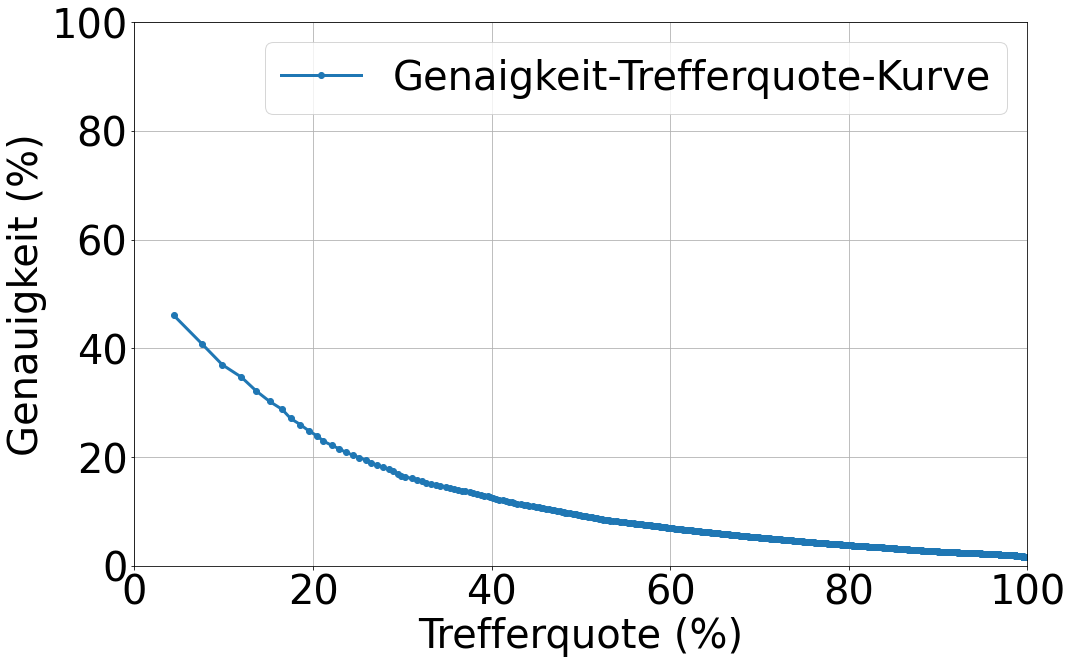

In [20]:
# plotten: Genaigkeit-Trefferquote-Digramm
res_pres = [re_pre1]
labels = ['Genaigkeit-Trefferquote-Kurve', 'Label_2']
plt.rcParams['figure.figsize'] = [16, 10]
plt.rcParams.update({'font.size': 40})
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('Trefferquote (%)')
plt.ylabel('Genauigkeit (%)')
plt.grid()
for i in range(len(res_pres)):
    curve_test = res_pres[i] * 100
    plt.plot(curve_test.T[0], curve_test.T[1], label=labels[i], marker='o', linewidth='3')
plt.legend(loc='upper right', prop={'size':40})
plt.show()


In [16]:
obj = get_off_PSB(dir, 100) # model-ID kann beliebig gewwählt werden (2. Argument)
# Visualisierung
ipv.figure()
obj.plot_X_v3()  # hier werden die Klassenfuntionen zur Visualiserung der Meshes und der Kureven abgerufen
ipv.xyzlim(-2,2)
ipv.show()

In [23]:
root_dir_norm = r'C:\Users\AmerM\OneDrive - SBL\2021-22\MA\FT\vsc\objekte\OBJ'
o1 = object2.from_obj(os.path.join(root_dir_norm, 'norm1_MA.obj'))
# o2 = object2.from_obj(os.path.join(root_dir_norm, 'norm2_MA.obj'))
# o3 = object2.from_obj(os.path.join(root_dir_norm, 'norm3_MA.obj'))
# o4 = object2.from_obj(os.path.join(root_dir_norm, 'norm4_MA.obj'))
# o5 = object2.from_obj(os.path.join(root_dir_norm, 'norm5_MA.obj'))

In [16]:
def get_coordinates(V):
    x = []
    y = []
    z = []
    for i in V:
        x.append(i.x)
        y.append(i.y)
        z.append(i.z)
    return x, y, z

def reflect(V2, Fl):
    V3 = []
    # s = 1 / scale
    for v in V2:
        v3 = v.multiply_vec3(Fl)
        V3.append(v3)
    return V3

def scale(V2, scale):
    V3 = []
    s = 1 / scale
    for v in V2:
        v3 = v.multiply_scalar(s)
        V3.append(v3)
    return V3


In [20]:
x,y,z = get_coordinates(o1.V)
fig = ipv.figure()
p = ipv.plot_trisurf(x,y,z, triangles=o1.F, color='grey')
# ipv.pylab.view(0,90,3)
ipv.xyzlim(-2,2)
ipv.show()

In [22]:

def compute_frames_v3(X):
    x,y,z = get_coordinates(o1.X)
    x_frames = []
    y_frames = []
    z_frames = []
    for i in range(len(x)):
        x_frame = []
        y_frame = []
        z_frame = []
        for j in range(i):
            x_frame.append(x[j])
            y_frame.append(y[j])
            z_frame.append(z[j])
        x_frames.append(x_frame)
        y_frames.append(y_frame)
        z_frames.append(z_frame)
    return x_frames, y_frames, z_frames




def compute_frames_1d(r):
    frames = []
    for i in range(len(r)):
        frame = []
        for j in range(i):
            frame.append(r[j])
        frames.append(frame)
    return frames



# print(x)

In [24]:
# fig, ax = plt.subplots()

# global frames
# frames = compute_frames_1d(o1.R)

# ax.scatter([0], frames[1], color='red', linewidths=5)

In [18]:
r = o1.R
frames = compute_frames_1d(r)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


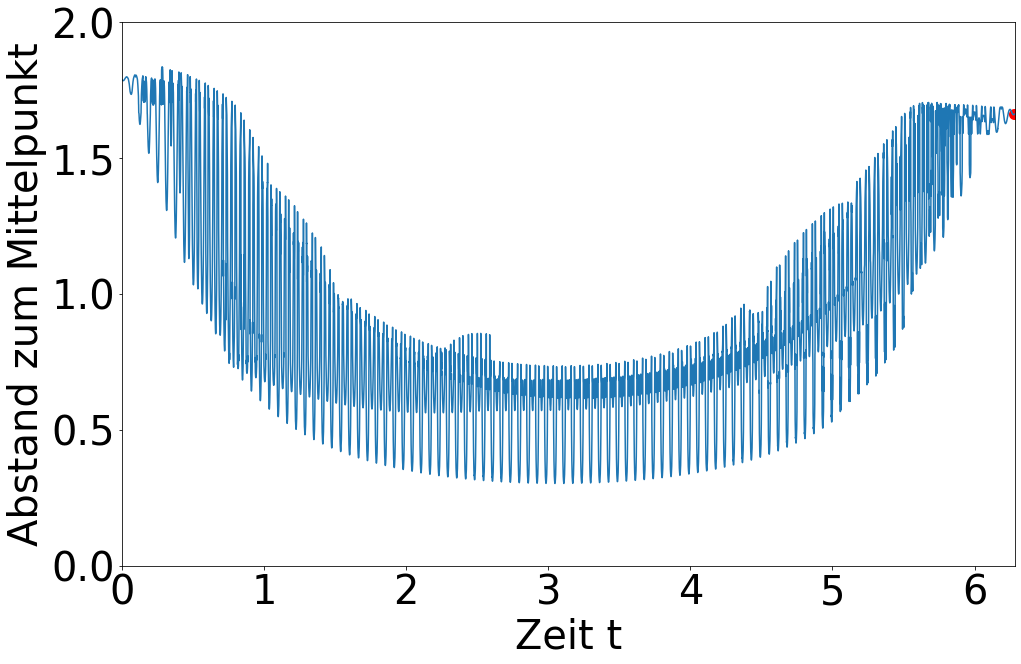

In [34]:
from moviepy.editor import VideoClip
from moviepy.video.io.bindings import mplfig_to_npimage

fig, ax = plt.subplots()

# global frames
# frames = compute_frames_1d(r)

# ax.scatter([0], frames[0][0], color='red', width='')
plt.rcParams['figure.figsize'] = [16, 10]
durtation = 30


ff = 0
def make_frame(t):
    t *= 500 # fps
    N = len(frames[len(frames)-1])
    try:
        r = frames[int(t)]
    except:
        r = frames[N]

    
    nn = len(r)
    tt = [(2*np.pi)*i/N for i in range(N)]
    ttt = tt[:nn]
    # print(ttt)

    ax.clear()
     
    # plotting line
    ax.plot(ttt, r)
    try:
        ax.scatter([ttt[len(ttt)-1]], [r[len(r)-1]], color='red', linewidths=5)
    except:
        pass
    ax.set_ylim(0, 2)
    ax.set_xlim(0, 2*np.pi)
    plt.xlabel('Zeit t')
    plt.ylabel('Abstand zum Mittelpunkt')
     
    # returning numpy image
    return mplfig_to_npimage(fig)
 
# creating animation
animation = VideoClip(make_frame, duration=durtation)
 
# displaying animation with auto play and looping
animation.ipython_display(fps = 120, loop = True, autoplay = True)

In [18]:
x,y,z = compute_frames_v3(o1.X)

In [20]:
# print(x[5])
# print(y[5])
# print(z[5])

fig = ipv.figure()
index = 1
line = ipv.plot(np.array(x[index]), np.array(y[index]), np.array(z[index]), color='red')
ipv.xyzlim(-2,2)
ipv.show()
# for i in range(0, len(x), 750):
#     index = i
#     line.x, line.y, line.z = np.array(x[index]), np.array(y[index]), np.array(z[index])
#     time.sleep(0.05)

In [21]:
from ipyvolume.moviemaker import MovieMaker
mm = MovieMaker(stream=fig, camera=fig.camera)
mm.widget_main

In [23]:
import ipywebrtc as webrtc
webrtc.MediaStream(steam=fig)

MediaStream()

In [ ]:
x,y,z = get_coordinates(o1.V)
fig = ipv.figure()
p = ipv.plot_trisurf(x,y,z, triangles=o1.F, color='grey')
# ipv.pylab.view(0,90,3)
ipv.xyzlim(-2,2)
ipv.show()

In [100]:
V2 = reflect(o1.V2, o1.Fl)
x, y, z = get_coordinates(V2)
p.x = x
# p.y = y
p.z = z

In [32]:
def plot_mesh_V(V,F, color='yellow'):
    x = []
    y = []
    z = []
    for i in V:
        x.append(i.x)
        y.append(i.y)
        z.append(i.z)
    p = ipv.plot_trisurf(x,y,z, triangles=F, color=color)
    return p

def plot_X_v3(self, color='red'):
    X = []
    Y = []
    Z = []
    for i in self.X:
        X.append(i.x)
        Y.append(i.y)
        Z.append(i.z)
    X = np.array(X)    
    Y = np.array(Y)
    Z = np.array(Z)
    line = ipv.plot(X, Y, Z, color=color)

def plot_U_v3(self, color='red'):
    X = []
    Y = []
    Z = []
    for i in self.U:
        X.append(i.x)
        Y.append(i.y)
        Z.append(i.z)
    X = np.array(X) * object2.plot_scale_U
    Y = np.array(Y) * object2.plot_scale_U
    Z = np.array(Z) * object2.plot_scale_U
    line = ipv.plot(X, Y, Z, color=color)

def scatter_U_v3(self, color='red'):
    X = []
    Y = []
    Z = []
    for i in self.U:
        X.append(i.x)
        Y.append(i.y)
        Z.append(i.z)
    X = np.array(X) * object2.plot_scale_U
    Y = np.array(Y) * object2.plot_scale_U
    Z = np.array(Z) * object2.plot_scale_U
    ipv.scatter(X, Y, Z, color=color)

def scatter_X_v3(self, color='red'):
    X = []
    Y = []
    Z = []
    for i in self.X:
        X.append(i.x)
        Y.append(i.y)
        Z.append(i.z)
    X = np.array(X)    
    Y = np.array(Y)
    Z = np.array(Z)
    ipv.scatter(X, Y, Z, color=color)

def plot_R(R):
    N = len(R)
    t = [(2*np.pi)*i/N for i in range(N)]
    plt.plot(t,R)
def plot_R_real(self):
    N = len(self.R_real)
    t = [(2*np.pi)*i/N for i in range(N)]
    plt.plot(t,self.R_real)

In [15]:
o1 = object2.from_obj('Porsche_911_GT2.obj')

In [17]:
o1.plot_mesh_V3()
ipv.xyzlim(-2,2)
ipv.show()

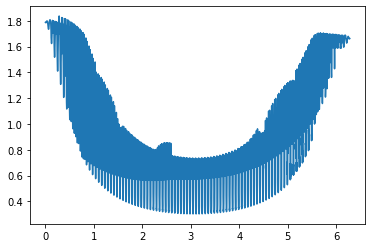

In [18]:
o1.plot_R()
plt.show()